In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/dataset_distill.csv",skiprows=[1189],sep=";")

In [ ]:
df.head()

,Pressure,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T11,T12,T13,T14,L,V,D,B,F,Ethanol concentration
0,1.01,350.89,350.95,351.01,351.08,351.16,351.26,351.38,351.54,351.78,...,353.00,355.19,363.77,371.47,780,1040,260,340,600,0.82076
1,1.01,350.86,350.91,350.96,351.02,351.09,351.17,351.28,351.43,351.66,...,352.76,354.66,362.20,370.98,780,1040,260,340,600,0.83253
2,1.01,350.85,350.89,350.93,350.99,351.05,351.13,351.23,351.37,351.58,...,352.55,354.13,360.16,370.10,780,1040,260,340,600,0.83953
3,1.01,350.84,350.88,350.92,350.97,351.03,351.11,351.21,351.34,351.53,...,352.40,353.75,358.45,368.99,780,1040,260,340,600,0.84366
4,1.01,350.83,350.87,350.91,350.96,351.02,351.09,351.18,351.31,351.49,...,352.30,353.50,357.23,367.81,780,1040,260,340,600,0.84622


T1 is the temperature of the tray at the top while T14 is the temperature of the bottom tray. L is the liquid flow rate, V is the vapour flow rate, D is the flow rate of distillate, B is the flow rate of bottom, F is the feed flow rate


In [ ]:
df.isnull().sum()

Pressure                 0
T1                       0
T2                       0
T3                       0
T4                       0
T5                       0
T6                       0
T7                       0
T8                       0
T9                       0
T10                      0
T11                      0
T12                      0
T13                      0
T14                      0
L                        0
V                        0
D                        0
B                        0
F                        0
Ethanol concentration    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pressure               4407 non-null   float64
 1   T1                     4407 non-null   float64
 2   T2                     4407 non-null   float64
 3   T3                     4407 non-null   float64
 4   T4                     4407 non-null   float64
 5   T5                     4407 non-null   float64
 6   T6                     4407 non-null   float64
 7   T7                     4407 non-null   float64
 8   T8                     4407 non-null   float64
 9   T9                     4407 non-null   float64
 10  T10                    4407 non-null   float64
 11  T11                    4407 non-null   float64
 12  T12                    4407 non-null   float64
 13  T13                    4407 non-null   float64
 14  T14                    4407 non-null   float64
 15  L   

Converting string values of L and V to float64

In [ ]:
df['L'] = df['L'].apply(lambda x: int(x.split()[0].replace(',', '')) if isinstance(x, str) and x.split()[0].replace(',', '').replace('.', '', 1).isdigit() else None)
df['V'] = df['V'].apply(lambda x: int(x.split()[0].replace(',', '')) if isinstance(x, str) and x.split()[0].replace(',', '').replace('.', '', 1).isdigit() else None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pressure               4407 non-null   float64
 1   T1                     4407 non-null   float64
 2   T2                     4407 non-null   float64
 3   T3                     4407 non-null   float64
 4   T4                     4407 non-null   float64
 5   T5                     4407 non-null   float64
 6   T6                     4407 non-null   float64
 7   T7                     4407 non-null   float64
 8   T8                     4407 non-null   float64
 9   T9                     4407 non-null   float64
 10  T10                    4407 non-null   float64
 11  T11                    4407 non-null   float64
 12  T12                    4407 non-null   float64
 13  T13                    4407 non-null   float64
 14  T14                    4407 non-null   float64
 15  L   

From statistical inference, we concluded that the Liquid and vapour flow rate contains outliers.

In [ ]:
df.describe()

,Pressure,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T11,T12,T13,T14,L,V,D,B,F,Ethanol concentration
count,4407.00,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,...,4407.000000,4407.000000,4407.000000,4407.000000,4150.000000,4150.000000,4407.000000,4407.000000,4407.000000,4407.000000
mean,1.01,351.029108,351.409505,352.066492,352.829038,353.910903,355.215255,356.455228,357.541380,358.485652,...,360.050250,360.884404,364.365768,367.716095,2229.772289,2475.492771,251.801679,293.410483,545.212162,0.792184
std,0.00,0.334120,1.125313,2.671423,3.788725,4.986802,6.251395,7.120174,7.620491,7.882293,...,7.899371,7.604847,8.563538,6.639733,5600.401081,5577.398545,71.040664,108.563267,119.195915,0.076436
min,1.01,350.760000,350.770000,350.770000,350.790000,350.800000,350.820000,350.860000,350.910000,351.000000,...,351.500000,352.430000,353.150000,354.520000,75.000000,225.000000,150.000000,90.000000,350.000000,0.538190
25%,1.01,350.820000,350.860000,350.900000,350.950000,351.000000,351.070000,351.160000,351.280000,351.440000,...,352.220000,353.320000,354.750000,362.920000,450.000000,600.000000,150.000000,200.000000,350.000000,0.761850
50%,1.01,350.900000,350.990000,351.100000,351.260000,351.480000,351.840000,352.370000,352.930000,353.740000,...,356.790000,361.480000,370.760000,372.810000,780.000000,1040.000000,260.000000,340.000000,600.000000,0.817520
75%,1.01,351.080000,351.390000,351.825000,352.410000,353.740000,356.875000,361.640000,364.750000,366.880000,...,367.525000,367.910000,372.440000,373.010000,1050.000000,1400.000000,260.000000,365.000000,600.000000,0.850270
max,1.01,352.320000,356.030000,364.970000,368.600000,369.060000,372.570000,372.970000,373.010000,373.010000,...,373.010000,373.010000,373.060000,373.070000,22500.000000,22650.000000,350.000000,450.000000,650.000000,0.891760


In [ ]:
df.isnull().sum()

Pressure                   0
T1                         0
T2                         0
T3                         0
T4                         0
T5                         0
T6                         0
T7                         0
T8                         0
T9                         0
T10                        0
T11                        0
T12                        0
T13                        0
T14                        0
L                        257
V                        257
D                          0
B                          0
F                          0
Ethanol concentration      0
dtype: int64

Visualization of outliers

<Axes: >

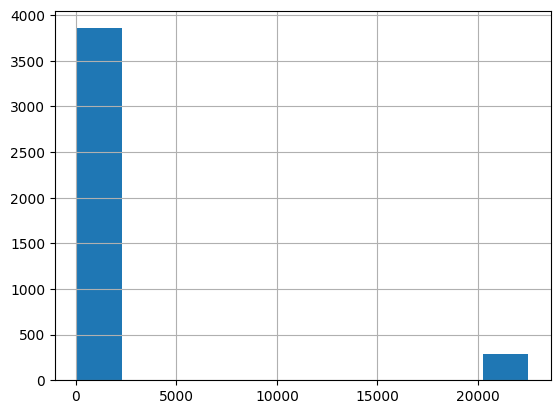

In [ ]:
df['L'].hist(bins=10)


<Axes: >

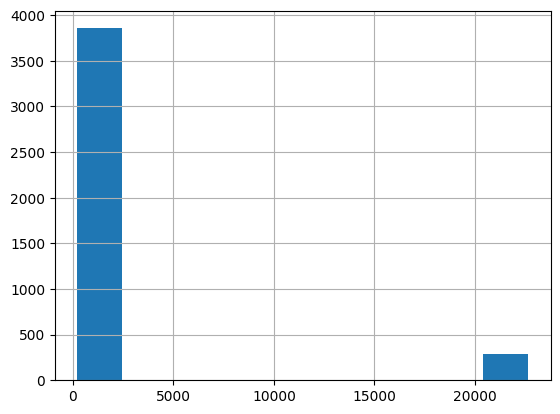

In [ ]:
df["V"].hist(bins=10)

In [ ]:
df = df.drop(df[df["L"] > 3*df["L"].mean()].index)


In [ ]:

df.describe()

,Pressure,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T11,T12,T13,T14,L,V,D,B,F,Ethanol concentration
count,4114.00,4114.000000,4114.000000,4114.00000,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000,...,4114.000000,4114.000000,4114.000000,4114.000000,3857.000000,3857.000000,4114.000000,4114.000000,4114.000000,4114.000000
mean,1.01,351.040518,351.443099,352.13753,352.931658,354.010634,355.182591,356.205277,357.101045,357.895561,...,359.327324,360.155596,363.811719,367.347820,689.928701,942.920664,259.052018,300.063199,559.115216,0.789136
std,0.00,0.342344,1.156849,2.75031,3.897150,5.104672,6.259111,6.934140,7.307204,7.504011,...,7.483551,7.215514,8.555404,6.719066,393.611690,441.351783,67.937026,109.360566,110.958273,0.077743
min,1.01,350.760000,350.770000,350.78000,350.790000,350.810000,350.840000,350.880000,350.950000,351.070000,...,351.860000,352.680000,353.150000,354.520000,75.000000,225.000000,150.000000,90.000000,350.000000,0.538190
25%,1.01,350.830000,350.860000,350.90000,350.950000,351.000000,351.070000,351.160000,351.270000,351.430000,...,352.140000,353.182500,354.750000,362.920000,450.000000,600.000000,260.000000,250.000000,600.000000,0.756090
50%,1.01,350.910000,351.000000,351.12000,351.265000,351.470000,351.810000,352.240000,352.815000,353.150000,...,354.605000,358.010000,368.615000,372.515000,780.000000,1040.000000,260.000000,340.000000,600.000000,0.815270
75%,1.01,351.110000,351.430000,351.90000,352.547500,353.830000,356.575000,361.540000,362.412500,365.607500,...,367.400000,367.420000,372.340000,373.000000,1040.000000,1300.000000,350.000000,390.000000,650.000000,0.849590
max,1.01,352.320000,356.030000,364.97000,368.600000,369.060000,372.570000,372.970000,373.010000,373.010000,...,373.010000,373.010000,373.060000,373.070000,1400.000000,1750.000000,350.000000,450.000000,650.000000,0.889290


<Axes: >

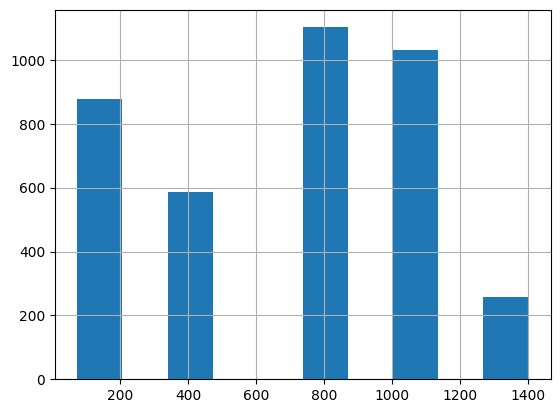

In [ ]:
df["L"].hist(bins=10)

In [ ]:
df["L"].fillna(df["L"].mean(), inplace=True)
df["V"].fillna(df["V"].mean(), inplace=True)


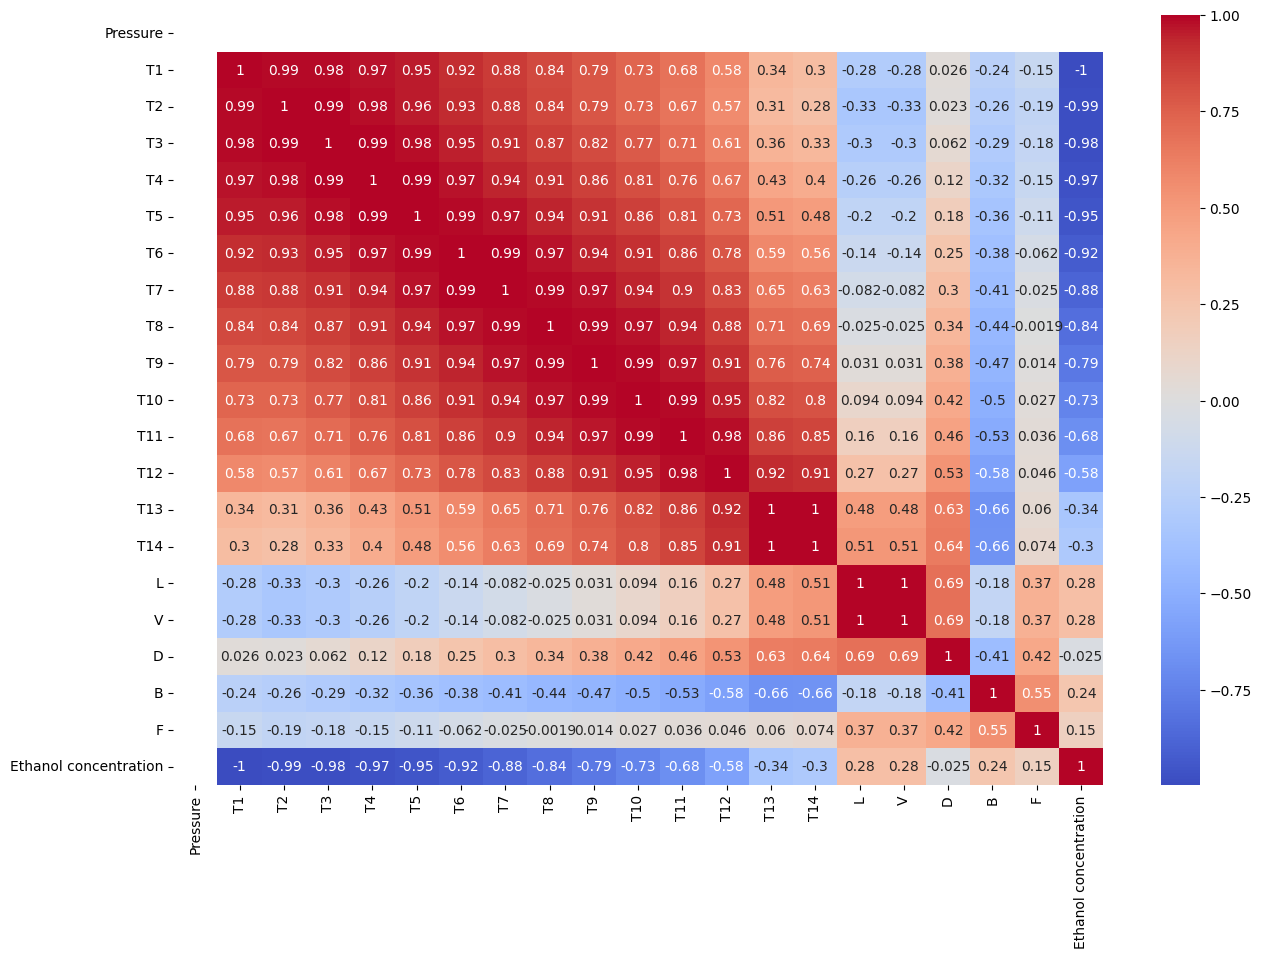

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr(method='spearman')

plt.figure(figsize=(15, 10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()


From the spearman coorelation we could infer-
1) Temperature of upper trays strongly impacts the concentration of ethanol.
2)Flow rate of distillate has least impact on ethanol concentration.


In [ ]:
df.drop(columns="Pressure",inplace=True)

In [ ]:
X=df.drop(columns="Ethanol concentration")
y=df["Ethanol concentration"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X=scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model_l=LinearRegression()
model_l.fit(X_train,y_train)

LinearRegression()

In [ ]:
def obtain_effectiveness(model):
  y_pred=model.predict(X_test)
  import numpy as np
  from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
  r2=r2_score(y_test,y_pred)
  mae=mean_absolute_error(y_test,y_pred)
  mse=mean_squared_error(y_test,y_pred)
  rmse=np.sqrt(mse)
  print("Mean absolute error:" , mae)
  print("Root mean squared error:" , rmse)
  print("R2 score:" , r2)

In [ ]:
obtain_effectiveness(model_l)

Mean absolute error: 0.004474454347517333
Root mean squared error: 0.006597756081133624
R2 score: 0.9933404493370848


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,max_depth=15,verbose=1)
rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.8s


RandomForestRegressor(max_depth=15, verbose=1)

In [ ]:
obtain_effectiveness(rf)

Mean absolute error: 0.0003555539318206139
Root mean squared error: 0.000583651020669588
R2 score: 0.9999478854592992


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
obtain_effectiveness(gb)

Mean absolute error: 0.0006091604569340049
Root mean squared error: 0.0008152736652546794
R2 score: 0.9998983144495154


All the machine learning regressors came up with similar performance on the data.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model=Sequential()
model.add(Dense(128,activation="relu",input_shape=(X_train.shape[1],)))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="linear"))

In [ ]:
callback=EarlyStopping(monitor="val_loss",patience=20,restore_best_weights=True)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss="mean_squared_error",metrics=["mean_absolute_error"])

In [ ]:
history=model.fit(X_train,y_train,epochs=300,batch_size=64,verbose=1,validation_data=(X_test,y_test),callbacks=callback)

Epoch 1/300
52/52 [==============================] - 3s 14ms/step - loss: 0.4350 - mean_absolute_error: 0.6424 - val_loss: 0.2609 - val_mean_absolute_error: 0.4881
Epoch 2/300
52/52 [==============================] - 0s 8ms/step - loss: 0.1537 - mean_absolute_error: 0.3513 - val_loss: 0.0744 - val_mean_absolute_error: 0.2390
Epoch 3/300
52/52 [==============================] - 0s 7ms/step - loss: 0.0441 - mean_absolute_error: 0.1850 - val_loss: 0.0223 - val_mean_absolute_error: 0.1365
Epoch 4/300
52/52 [==============================] - 0s 9ms/step - loss: 0.0159 - mean_absolute_error: 0.1107 - val_loss: 0.0113 - val_mean_absolute_error: 0.0919
Epoch 5/300
52/52 [==============================] - 0s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0818 - val_loss: 0.0081 - val_mean_absolute_error: 0.0739
Epoch 6/300
52/52 [==============================] - 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0680 - val_loss: 0.0062 - val_mean_absolute_error: 0.0626
Epoch 7/300
52/52 [==

In [ ]:
obtain_effectiveness(model)

26/26 [==============================] - 0s 1ms/step
Mean absolute error: 0.0007464741047966992
Root mean squared error: 0.0011891257639678199
R2 score: 0.999783674361902


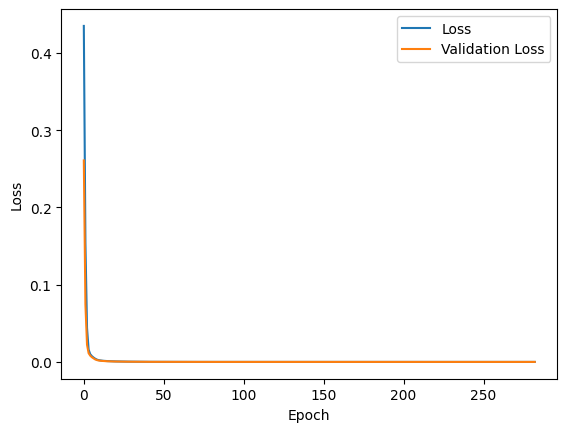

In [ ]:

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
y_predicted=rf.predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


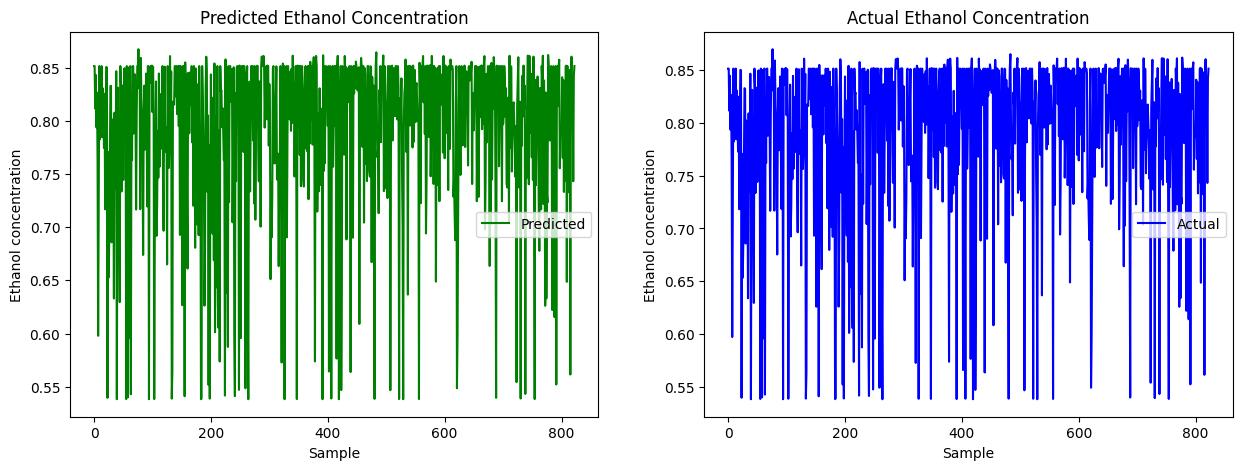

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

# Plot y_predicted
plt.subplot(1, 2, 1)
plt.plot(y_predicted, color='green', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Ethanol concentration')
plt.title('Predicted Ethanol Concentration')
plt.legend()

# Plot y_test
plt.subplot(1, 2, 2)
plt.plot(y_test.values, color='blue', label='Actual')
plt.xlabel('Sample')
plt.ylabel('Ethanol concentration')
plt.title('Actual Ethanol Concentration')
plt.legend()

plt.show()
